 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
csvpath = Path('Resources/whale_returns.csv')
whale_dataframe = pd.read_csv(csvpath, index_col="Date",parse_dates=True,infer_datetime_format=True)
whale_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_dataframe = whale_dataframe.dropna().copy()
whale_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
csvpath = Path('Resources/algo_returns.csv')
algo_dataframe = pd.read_csv(csvpath, index_col="Date",parse_dates=True, infer_datetime_format=True)
algo_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_dataframe = algo_dataframe.dropna().copy()
algo_dataframe.isnull().sum()
algo_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
csvpath = Path('Resources/sp500_history.csv')
sp50_dataframe = pd.read_csv(csvpath, index_col="Date", parse_dates=True,infer_datetime_format=True)
sp50_dataframe.sort_values(by = 'Date', inplace=True)
sp50_dataframe.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp50_dataframe.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp50_dataframe['Close'] = sp50_dataframe['Close'].str.replace('$','')
sp50_dataframe.head()
sp50_dataframe['Close'] = sp50_dataframe['Close'].astype('float')
sp50_dataframe.dtypes

C:\Users\chees\AppData\Local\Temp\ipykernel_33788\2321874807.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp50_dataframe['Close'] = sp50_dataframe['Close'].str.replace('$','')


Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp50_dailyreturns = sp50_dataframe.pct_change()
sp50_dailyreturns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp50_dailyreturns.isnull().sum()
sp50_dailyreturns = sp50_dailyreturns.dropna().copy()
sp50_dailyreturns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp50_dailyreturns = sp50_dailyreturns.rename(columns={'Close': 'SP50 Daily Return'})
sp50_dailyreturns.head()

,SP50 Daily Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
allreturns_df = pd.concat([sp50_dailyreturns, whale_dataframe, algo_dataframe], axis='columns', join='inner')
allreturns_df.head()

,SP50 Daily Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.004389,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.001196,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.003944,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

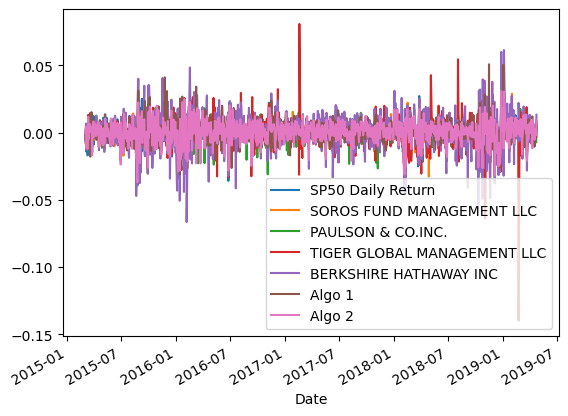

In [16]:
# Plot daily returns of all portfolios
allreturns_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

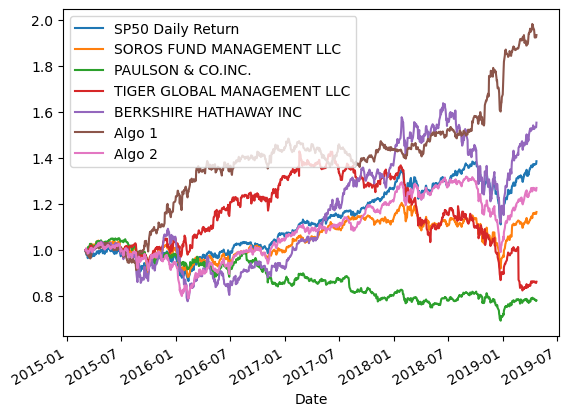

In [17]:
# Calculate cumulative returns of all portfolios
cumreturn = (1+allreturns_df).cumprod()
# Plot cumulative returns
cumreturn.plot()

Berkshire Hawthaway and Algo 1 portfolios outperform the S&P 500!

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

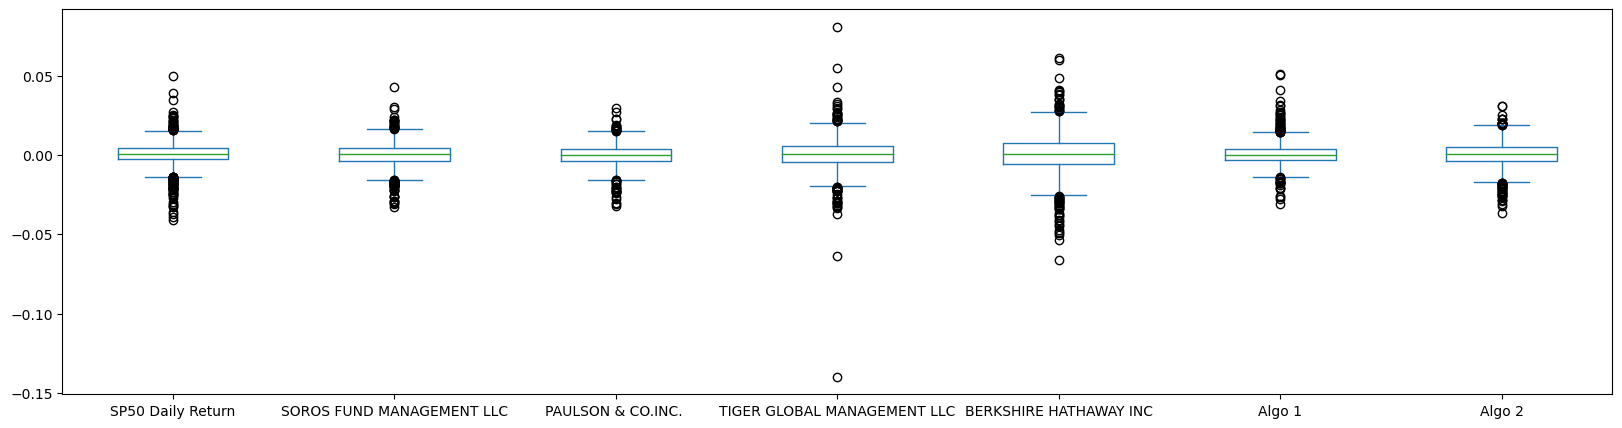

In [18]:
# Box plot to visually show risk
allreturns_df.plot(kind='box', figsize=(20,5))


### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
allreturns_df.std()

SP50 Daily Return              0.008554
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp50_volatility = allreturns_df['SP50 Daily Return'].std()
# Determine which portfolios are riskier than the S&P 500
if sp50_volatility < allreturns_df['SOROS FUND MANAGEMENT LLC'].std():
    print('SOROS FUND MANAGEMENT LLC is riskier')
if sp50_volatility < allreturns_df['PAULSON & CO.INC. '].std():
    print('PAULSON & CO.INC. is riskier')
if sp50_volatility < allreturns_df['TIGER GLOBAL MANAGEMENT LLC'].std():
    print('TIGER GLOBAL MANAGEMENT LLC is riskier')
if sp50_volatility < allreturns_df['BERKSHIRE HATHAWAY INC'].std():
    print('BERKSHIRE HATHAWAY INC is riskier')
if sp50_volatility < allreturns_df['Algo 1'].std():
    print('Algo 1 is riskier')
if sp50_volatility < allreturns_df['Algo 2'].std():
    print('Algo 2 is riskier')
print('Paulson & Co is the least risky fund!')

TIGER GLOBAL MANAGEMENT LLC is riskier
BERKSHIRE HATHAWAY INC is riskier
Paulson & Co is the least risky fund!


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_volatility = allreturns_df.std() * np.sqrt(252)
print(annualized_volatility)

SP50 Daily Return              0.135786
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

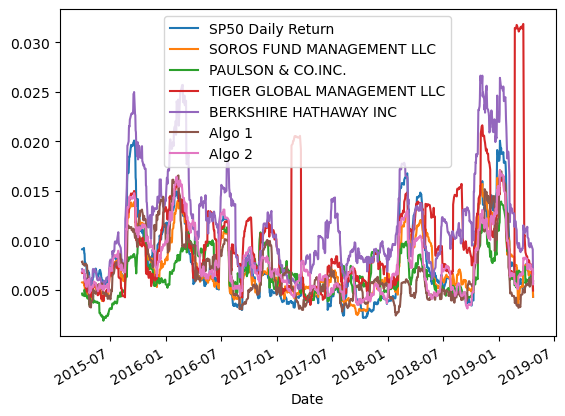

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
allreturns_df.rolling(window=21).std()
# Plot the rolling standard deviation
allreturns_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = allreturns_df.corr()
# Display de correlation matrix
correlation

,SP50 Daily Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SP50 Daily Return,1.000000,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764
SOROS FUND MANAGEMENT LLC,0.837864,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873
PAULSON & CO.INC.,0.669732,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.751371,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082
Algo 1,0.279494,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243
Algo 2,0.858764,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

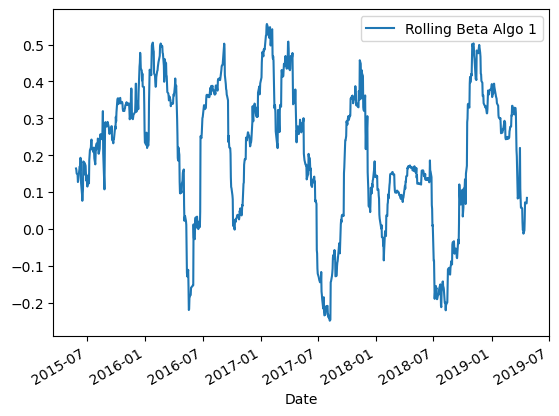

In [24]:
# Calculate covariance of a single portfolio
covariance_algo_1 = allreturns_df['Algo 1'].cov(allreturns_df['SP50 Daily Return'])
covariance_algo_1
# Calculate variance of S&P 500
variance_sp50 = allreturns_df['SP50 Daily Return'].var()
variance_sp50
# Computing beta
beta_algo_1 = covariance_algo_1 / variance_sp50
beta_algo_1
# Plot beta trend
rollingcovariance_algo_1 = allreturns_df['Algo 1'].rolling(window=60).cov(allreturns_df['SP50 Daily Return'])
rollingvariance_sp50 = allreturns_df['SP50 Daily Return'].rolling(window=60).var()
rollingbeta_algo_1 = rollingcovariance_algo_1 / rollingvariance_sp50
ax = rollingbeta_algo_1.plot()
ax.legend(['Rolling Beta Algo 1'])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [25]:
# Use `ewm` to calculate the rolling window
allreturns_df.ewm(halflife=21).std()

,SP50 Daily Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.000106,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380
2015-03-05,0.003294,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662
2015-03-06,0.006498,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166
2015-03-09,0.007083,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290
...,...,...,...,...,...,...,...
2019-04-16,0.007837,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938
2019-04-17,0.007736,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896
2019-04-18,0.007610,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
annualized_volatility = allreturns_df.std() * np.sqrt(252)
annualized_return = allreturns_df.mean() * np.sqrt(252)
annualized_sharpes = annualized_return / annualized_volatility
annualized_sharpes


SP50 Daily Return              0.040837
SOROS FUND MANAGEMENT LLC      0.022452
PAULSON & CO.INC.             -0.030462
TIGER GLOBAL MANAGEMENT LLC   -0.007626
BERKSHIRE HATHAWAY INC         0.039170
Algo 1                         0.086847
Algo 2                         0.031583
dtype: float64

<AxesSubplot:>

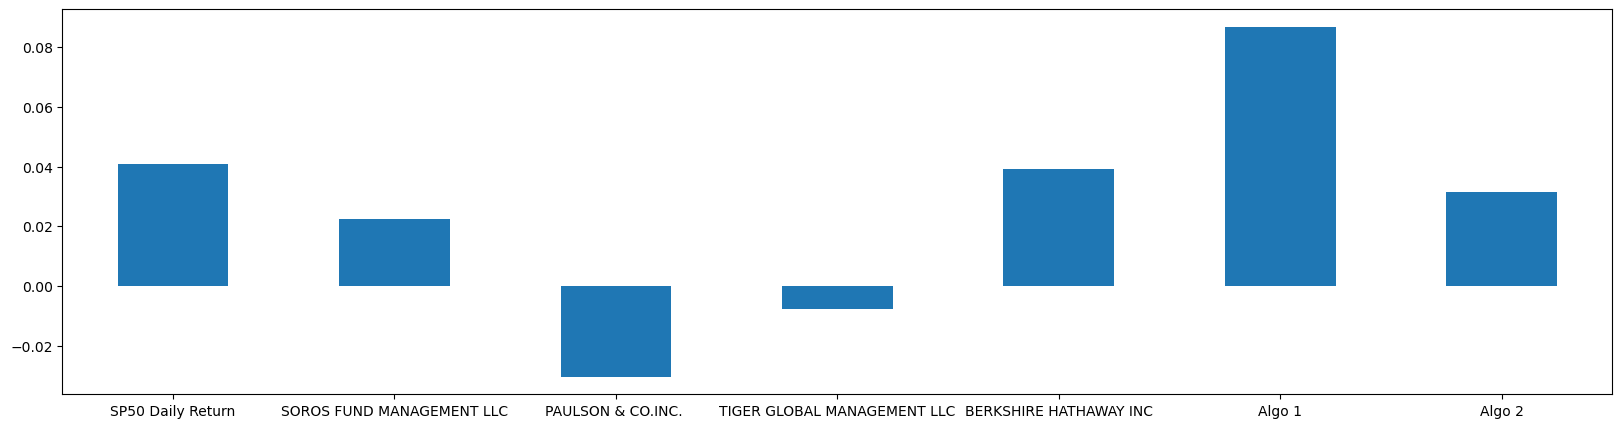

In [27]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpes.plot(kind='bar', rot = 0, figsize = (20,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Measured by the sharpe ratios, algo 1 outperforms the whales and market, while algo 2 outperforms the whales but not the market.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
pwd

'c:\\Users\\chees\\Challenges\\Module4_algo\\algorithmic_trading\\Starter_Code'

In [29]:
# Reading data from 1st stock
csv = Path('Resources/CRM.csv')
crm_df = pd.read_csv(csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
crm_df.head()

,crm
Date,
2018-01-02,104.41
2018-01-03,105.29
2018-01-04,106.68
2018-01-05,108.10
2018-01-08,108.86


In [30]:
# Reading data from 2nd stock
csv = Path('Resources/COMT.csv')
comt_df = pd.read_csv(csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
comt_df.head()

,comt
Date,
2018-01-02,36.60
2018-01-03,36.83
2018-01-04,36.90
2018-01-05,36.86
2018-01-08,36.91


In [31]:
# Reading data from 3rd stock
csv = Path('Resources/PLUG.csv')
plug_df = pd.read_csv(csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
plug_df.head()

,plug
Date,
2018-01-02,2.42
2018-01-03,2.42
2018-01-04,2.40
2018-01-05,2.36
2018-01-08,2.33


In [32]:
# Combine all stocks in a single DataFrame
df = pd.concat([plug_df, comt_df, crm_df], axis = 'columns', join = 'inner')
df.head()


,plug,comt,crm
Date,,,
2018-01-02,2.42,36.60,104.41
2018-01-03,2.42,36.83,105.29
2018-01-04,2.40,36.90,106.68
2018-01-05,2.36,36.86,108.10
2018-01-08,2.33,36.91,108.86


In [33]:
# Reset Date index
#df = df.reset_index()
#df.head()

In [34]:
# Reorganize portfolio data by having a column per symbol
    #There already is one column per symbol 

In [35]:
# Calculate daily returns
df_returns = df.pct_change()
df_returns.head()
# Drop NAs
df_returns = df_returns.dropna()
# Display sample data
df_returns.head()

,plug,comt,crm
Date,,,
2018-01-03,0.000000,0.006284,0.008428
2018-01-04,-0.008264,0.001901,0.013202
2018-01-05,-0.016667,-0.001084,0.013311
2018-01-08,-0.012712,0.001356,0.007031
2018-01-09,-0.004292,0.008670,0.002664


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = df_returns.dot(weights)
# Display sample data
portfolio_return.head()

Date
2018-01-03    0.004904
2018-01-04    0.002279
2018-01-05   -0.001480
2018-01-08   -0.001442
2018-01-09    0.002347
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_return = pd.DataFrame(portfolio_return)
portfolio_return.head()
portfolio_return = portfolio_return.reset_index()
portfolio_return['Date'] = pd.to_datetime(portfolio_return['Date'], infer_datetime_format=True)
portfolio_return.head()
portfolio_return = portfolio_return.set_index('Date')
portfolio_return.head()
#portfolio_return = pd.read_csv(csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
combined_df = pd.concat([allreturns_df, portfolio_return], axis= 'columns', join = 'inner')
combined_df.head()
combined_df = combined_df.rename(columns={0: 'Personal Portfolio'})
combined_df.head()


,SP50 Daily Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Personal Portfolio
Date,,,,,,,,
2018-01-03,0.006399,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.004904
2018-01-04,0.004029,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002279
2018-01-05,0.007034,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.001480
2018-01-08,0.001662,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001442
2018-01-09,0.001303,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.002347


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df = combined_df.dropna()
combined_df.head()


,SP50 Daily Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Personal Portfolio
Date,,,,,,,,
2018-01-03,0.006399,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.004904
2018-01-04,0.004029,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002279
2018-01-05,0.007034,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.001480
2018-01-08,0.001662,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001442
2018-01-09,0.001303,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.002347


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
combined_df['Personal Portfolio'].std() * np.sqrt(252)

0.2830998940562911

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

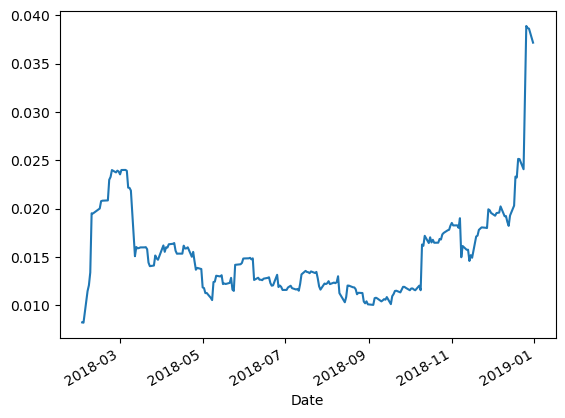

In [40]:
# Calculate rolling standard deviation
rolling_stddev_portfolio = combined_df['Personal Portfolio'].rolling(window=21).std()
rolling_stddev_portfolio
# Plot rolling standard deviation
rolling_stddev_portfolio.plot(kind='line')

### Calculate and plot the correlation

In [41]:
# Calculate and plot the correlation
combined_df.corr()

,SP50 Daily Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Personal Portfolio
SP50 Daily Return,1.000000,0.858390,0.816676,0.702874,0.837869,0.324546,0.895958,0.724896
SOROS FUND MANAGEMENT LLC,0.858390,1.000000,0.785223,0.615549,0.802833,0.381654,0.846903,0.686179
PAULSON & CO.INC.,0.816676,0.785223,1.000000,0.663716,0.678808,0.360494,0.817367,0.602366
TIGER GLOBAL MANAGEMENT LLC,0.702874,0.615549,0.663716,1.000000,0.501406,0.186736,0.619016,0.432735
BERKSHIRE HATHAWAY INC,0.837869,0.802833,0.678808,0.501406,1.000000,0.374323,0.800103,0.692523
Algo 1,0.324546,0.381654,0.360494,0.186736,0.374323,1.000000,0.362932,0.336962
Algo 2,0.895958,0.846903,0.817367,0.619016,0.800103,0.362932,1.000000,0.721050
Personal Portfolio,0.724896,0.686179,0.602366,0.432735,0.692523,0.336962,0.721050,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

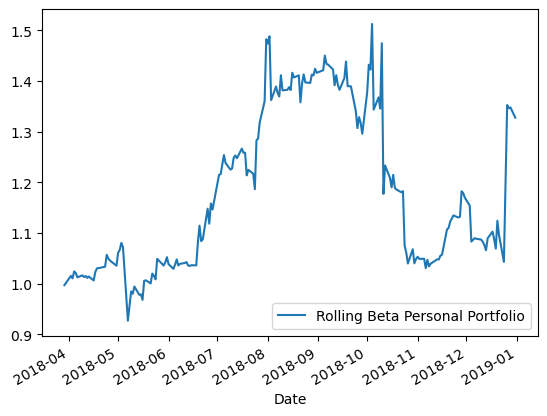

In [42]:
# Calculate and plot Beta
covariance_portfolio = combined_df['Personal Portfolio'].cov(combined_df['SP50 Daily Return'])
variance_sp50 = combined_df['SP50 Daily Return'].var()
beta_portfolio = covariance_portfolio / variance_sp50
beta_portfolio

rollingcovariance_personal_portfolio = combined_df['Personal Portfolio'].rolling(window=60).cov(combined_df['SP50 Daily Return'])
rollingvariance_sp50 = combined_df['SP50 Daily Return'].rolling(window=60).var()
rollingbeta_personal_portfolio = rollingcovariance_personal_portfolio/ rollingvariance_sp50
ax = rollingbeta_personal_portfolio.plot()
ax.legend(['Rolling Beta Personal Portfolio'])


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios
annualized_return_portfolio = combined_df.mean() * np.sqrt(252)
annualized_volatility_portfolio = combined_df.std() * np.sqrt(252)
annualized_sharpe_portfolio = annualized_return_portfolio / annualized_volatility_portfolio
annualized_sharpe_portfolio

SP50 Daily Return             -0.021666
SOROS FUND MANAGEMENT LLC     -0.063103
PAULSON & CO.INC.             -0.067806
TIGER GLOBAL MANAGEMENT LLC   -0.114425
BERKSHIRE HATHAWAY INC        -0.036616
Algo 1                         0.084254
Algo 2                        -0.070803
Personal Portfolio            -0.026405
dtype: float64

<AxesSubplot:>

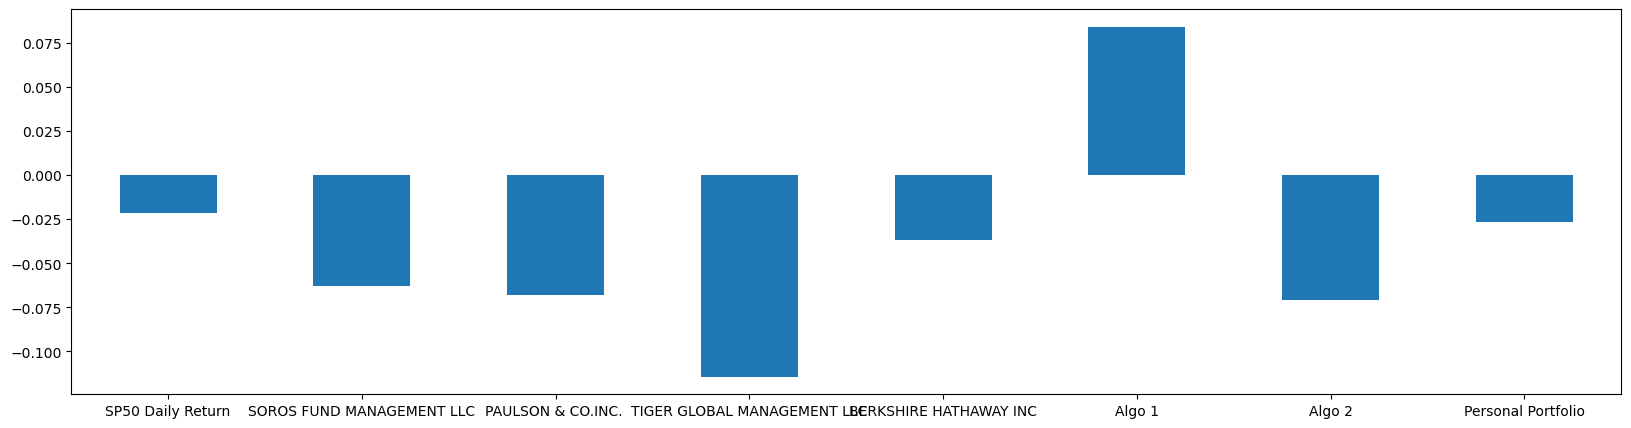

In [44]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_portfolio.plot(kind='bar', rot = 0, figsize = (20,5))

### How does your portfolio do?

Write your answer here!

Judging by risk-adjusted return, my portfolio did better than every portfolio except for the S&P500 and Algo 1. The S&P500 and Algo 1 were the only ones with a higher sharpe ratio over the observed period. 